In [ ]:
# Random Forest Case Study

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Read the .csv file and understand the structure of the dataset

medData = pd.read_csv("CTG.csv")
medData.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,1


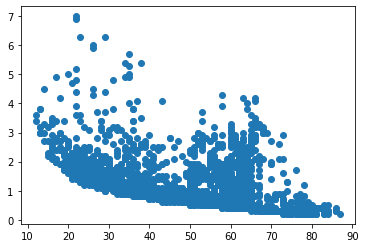

In [ ]:
# Make a scatter-plot between ‘ASTV’ & ‘MSTV’ columns

x = medData["ASTV"]
y = medData["MSTV"]

plt.scatter(x,y)
plt.show()


In [ ]:
# Take the ‘ASTV’ column as the independent variable and ‘NSP’ column as the dependent variable

x = medData["ASTV"]
y = medData["NSP"]

In [ ]:
# Divide the data into ‘train’ and ‘test’ sets with test size to be 30%

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((1488,), (638,), (1488,), (638,))

In [ ]:
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1488, 1), (638, 1), (1488, 1), (638, 1))

In [ ]:
# x_train = np.expand_dims(x_train, axis=1)
# x_test = np.expand_dims(x_test, axis=1)
# y_train = np.expand_dims(y_train, axis=1)
# y_test = np.expand_dims(y_test, axis=1)

# x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1488, 1), (638, 1), (1488, 1), (638, 1))

In [ ]:
# # Build the random forest classifier on the train set, where the numbers of
# estimators are 300. Then predict the values on the test set

rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predRF = rfc.predict(x_test)

In [ ]:
# Build a confusion matrix and also find out the accuracy of the model built.

cmRF = confusion_matrix(y_test, y_predRF)
print("Random Forest confusion matrix :\n",cmRF)

aScoreRF = accuracy_score(y_test, y_predRF)
print("Random Forest accuracy score :",aScoreRF)

Random Forest confusion matrix :
 [[466  17   7]
 [ 62  29   5]
 [ 26  17   9]]
Random Forest accuracy score : 0.7899686520376176


In [ ]:
(466+29+9)/(466+29+9+17+7+62+5+26+17)

0.7899686520376176

In [ ]:
# Take ‘LB’, ‘ASTV’, ‘MSTV’ and ‘Variance’ as the independent variables and ‘NSP’ as the
# dependent variable

X = medData[["LB","ASTV", "MSTV", "Variance"]]
Y = medData["NSP"]

In [ ]:
# Divide the data into ‘train’ & ‘test’ sets with test size to be 30%

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((1488, 4), (638, 4), (1488,), (638,))

In [ ]:
# Build the random forest classifier on the train set, where the numbers of
# estimators are 100. Then predict the values on the test set

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

y_predRF1 = rfc.predict(X_test)

In [ ]:
# Build a confusion matrix and also find out the accuracy of the model built

cmRF = confusion_matrix(Y_test, y_predRF1)
print("Random Forest confusion matrix :\n",cmRF)

aScoreRF = accuracy_score(Y_test, y_predRF1)
print("Random Forest accuracy score :",aScoreRF)

Random Forest confusion matrix :
 [[478   4   8]
 [ 32  58   6]
 [  6  11  35]]
Random Forest accuracy score : 0.8949843260188087


In [ ]:
(478+58+35)/(478+58+35+4+8+32+6+6+11)

0.8949843260188087